<a href="https://colab.research.google.com/github/Athrudev/Athrudev/blob/main/slot_machine_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What would you like to deposit? $200

💰 Current Balance: $200 💰
Press Enter to play (q to quit): 
Enter the number of lines to bet on (1-3)? 2
What would you like to bet on each line? $30
You are betting $30 on 2 lines. Total bet is equal to: $60

╔═════════════════════╗
║      SLOT MACHINE    ║
╠═════════════════════╣
║  E  │  E  │  D  ║
║───────┼───────┼───────║
║  E  │  E  │  A  ║
║───────┼───────┼───────║
║  C  │  D  │  D  ║
╚═════════════════════╝
Sorry, no win this time.

💰 Current Balance: $140 💰
Press Enter to play (q to quit): 
Enter the number of lines to bet on (1-3)? 2
What would you like to bet on each line? $30
You are betting $30 on 2 lines. Total bet is equal to: $60

╔═════════════════════╗
║      SLOT MACHINE    ║
╠═════════════════════╣
║  D  │  E  │  E  ║
║───────┼───────┼───────║
║  A  │  D  │  D  ║
║───────┼───────┼───────║
║  D  │  E  │  A  ║
╚═════════════════════╝
Sorry, no win this time.

💰 Current Balance: $80 💰
Press Enter to play (q to quit): 
Enter the num

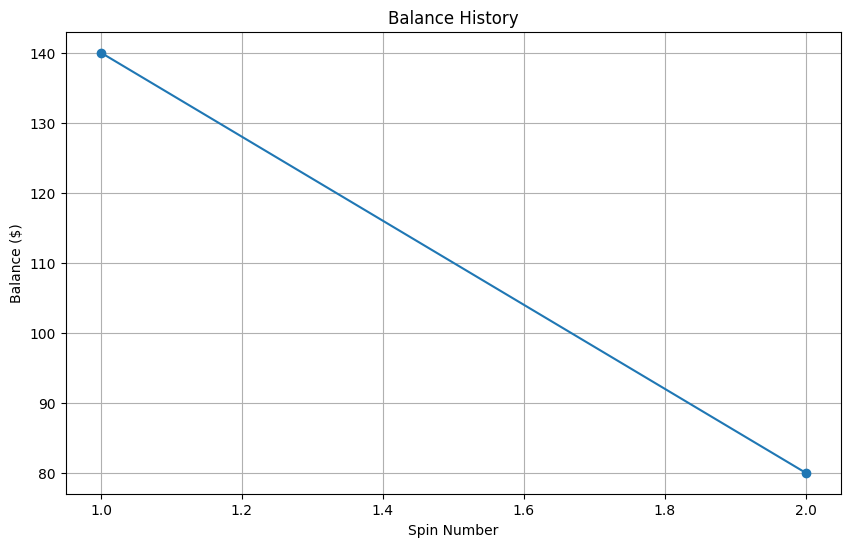

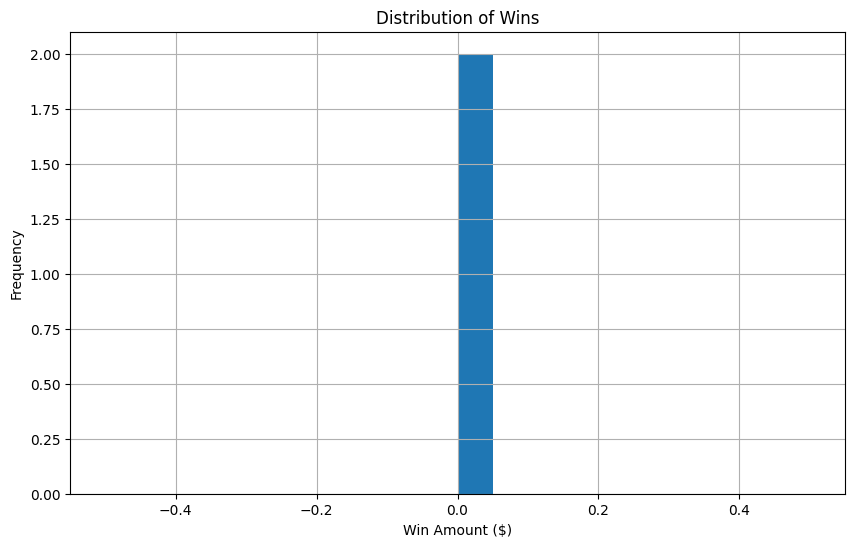

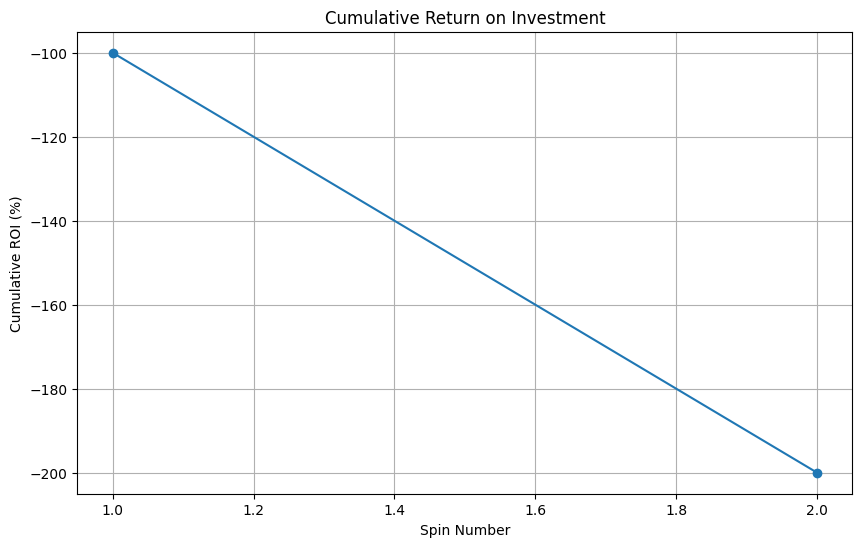

In [26]:
import random as r
import time
import pandas as pd
import matplotlib.pyplot as plt

MAX_LINES = 3
MAX_BET = 100
MIN_BET = 1
ROWS = 3
COLS = 3

symbol_count = {
    'A': 1,
    'B': 2,
    'C': 4,
    'D': 6,
    'E': 8,
    'BONUS': 1
}

symbol_value = {
    'A': 10,
    'B': 7,
    'C': 5,
    'D': 3,
    'E': 2,
    'BONUS': 0
}

class GameHistory:
    def __init__(self):
        self.history = pd.DataFrame(columns=['Spin', 'Bet', 'Lines', 'Win', 'Balance'])
        self.spin_count = 0

    def add_record(self, bet, lines, win, balance):
        self.spin_count += 1
        new_record = pd.DataFrame({
            'Spin': [self.spin_count],
            'Bet': [bet],
            'Lines': [lines],
            'Win': [win],
            'Balance': [balance]
        })
        self.history = pd.concat([self.history, new_record], ignore_index=True)

    def get_summary(self):
        summary = self.history.describe()
        return summary

def get_winning(columns, lines, bet, values):
    winning = 0
    win_lines = []
    for line in range(lines):
        symbol = columns[0][line]
        for column in columns:
            symbol_to_check = column[line]
            if symbol != symbol_to_check:
                break
        else:
            winning += values[symbol] * bet
            win_lines.append(line + 1)
    return winning, win_lines

def get_slot_machine_spins(rows, cols, symbols):
    all_symbols = []
    for symbol, symbol_cnt in symbols.items():
        for _ in range(symbol_cnt):
            all_symbols.append(symbol)

    columns = []
    for _ in range(cols):
        current_cols = []
        current_symbols = all_symbols[:]
        for _ in range(rows):
            value = r.choice(current_symbols)
            current_symbols.remove(value)
            current_cols.append(value)

        columns.append(current_cols)

    return columns

def print_slot_machine(columns):
    print("\n╔═════════════════════╗")
    print("║      SLOT MACHINE   ║")
    print("╠═════════════════════╣")
    for row in range(len(columns[0])):
        print("║", end="")
        for i, column in enumerate(columns):
            if i != len(columns) - 1:
                print(f"  {column[row]}  │", end="")
            else:
                print(f"  {column[row]}  ", end="")
        print("║")
        if row < len(columns[0]) - 1:
            print("║───────┼───────┼───────║")
    print("╚═════════════════════╝")

def deposit():
    while True:
        amount = input("What would you like to deposit? $")
        if amount.isdigit():
            amount = int(amount)
            if amount > 0:
                break
            else:
                print("Amount must be greater than 0....!")
        else:
            print("Please enter a number.")
    return amount

def get_num_of_lines():
    while True:
        lines = input(f"Enter the number of lines to bet on (1-{MAX_LINES})? ")
        if lines.isdigit():
            lines = int(lines)
            if 1 <= lines <= MAX_LINES:
                break
            else:
                print(f"lines must be between (1-{MAX_LINES}).....!")
        else:
            print("Please enter a number.")
    return lines

def get_bet():
    while True:
        bet = input("What would you like to bet on each line? $")
        if bet.isdigit():
            bet = int(bet)
            if MIN_BET <= bet <= MAX_BET:
                break
            else:
                print(f"Amount must be between ${MIN_BET}-${MAX_BET}...!")
        else:
            print("Please enter a number.")
    return bet

def bonus_round(balance, bet):
    free_spins = r.randint(5, 10)
    print(f"\n🌟 BONUS ROUND! You've won {free_spins} free spins! 🌟")
    total_bonus_winnings = 0

    for _ in range(free_spins):
        slots = get_slot_machine_spins(ROWS, COLS, symbol_count)
        print_slot_machine(slots)
        winning, win_lines = get_winning(slots, MAX_LINES, bet, symbol_value)
        total_bonus_winnings += winning
        print(f"Free spin win: ${winning}")

    print(f"Total bonus winnings: ${total_bonus_winnings}")
    return total_bonus_winnings

def risk_game(winning):
    print(f"\n🎲 RISK GAME: You've won ${winning}! Double or nothing? 🎲")
    choice = input("Enter 'y' to play or any other key to keep your winnings: ").lower()
    if choice == 'y':
        print("Guess if the next number will be high (7-13) or low (1-6).")
        guess = input("Enter 'h' for high or 'l' for low: ").lower()
        number = r.randint(1, 13)
        print(f"The number is: {number}")
        if (guess == 'h' and number >= 7) or (guess == 'l' and number <= 6):
            print(f"Congratulations! You've doubled your winnings to ${winning * 2}")
            return winning * 2
        else:
            print("Sorry, you've lost this round.")
            return 0
    return winning

def game(balance, game_history):
    lines = get_num_of_lines()
    bet = get_bet()
    total_bet = bet * lines

    if total_bet > balance:
        print(f"You do not have enough to bet that amount, your current balance is: ${balance}")
        return 0

    print(f'You are betting ${bet} on {lines} lines. Total bet is equal to: ${total_bet}')

    slots = get_slot_machine_spins(ROWS, COLS, symbol_count)
    print_slot_machine(slots)
    winning, win_lines = get_winning(slots, lines, bet, symbol_value)

    if winning > 0:
        print(f"You won ${winning}!")
        print(f"You won on lines:", *win_lines)
        winning = risk_game(winning)
    else:
        print("Sorry, no win this time.")

    if 'BONUS' in [column[1] for column in slots]:
        bonus_winnings = bonus_round(balance, bet)
        winning += bonus_winnings

    balance += winning - total_bet
    game_history.add_record(total_bet, lines, winning, balance)

    return balance

def plot_balance_history(game_history):
    plt.figure(figsize=(10, 6))
    plt.plot(game_history.history['Spin'], game_history.history['Balance'], marker='o')
    plt.title('Balance History')
    plt.xlabel('Spin Number')
    plt.ylabel('Balance ($)')
    plt.grid(True)
    plt.show()

def plot_win_distribution(game_history):
    plt.figure(figsize=(10, 6))
    game_history.history['Win'].hist(bins=20)
    plt.title('Distribution of Wins')
    plt.xlabel('Win Amount ($)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

def analyze_roi(game_history):
    game_history.history['ROI'] = (game_history.history['Win'] - game_history.history['Bet']) / game_history.history['Bet'] * 100

    plt.figure(figsize=(10, 6))
    plt.plot(game_history.history['Spin'], game_history.history['ROI'].cumsum(), marker='o')
    plt.title('Cumulative Return on Investment')
    plt.xlabel('Spin Number')
    plt.ylabel('Cumulative ROI (%)')
    plt.grid(True)
    plt.show()

def main():
    balance = deposit()
    game_history = GameHistory()

    while True:
        print(f"\n💰 Current Balance: ${balance} 💰")
        if balance == 0:
            print("Your balance is zero. You need to deposit more money to continue playing.")
            deposit_more = input("Would you like to deposit more? (yes/no): ").lower()
            if deposit_more == 'yes':
                balance += deposit()
            else:
                break

        user = input('Press Enter to play (q to quit): ').lower()
        if user == 'q':
            break

        balance = game(balance, game_history)

    print(f'\n🎉 Thanks for playing! You left with ${balance} 🎉')
    print("\nGame Summary:")
    print(game_history.get_summary())

    plot_balance_history(game_history)
    plot_win_distribution(game_history)
    analyze_roi(game_history)

if __name__ == "__main__":
    main()

# **Libraries Used:**
1. random (as r): Used for generating random choices in the slot machine.
2. time: Used for adding delays (not actively used in this version, but can be used for visual effects).
3. pandas (as pd): Used for data manipulation and storage of game history.
4. matplotlib.pyplot (as plt): Used for creating visualizations of game data.

# **Step-by-Step Breakdown:**

1. Constants and Symbol Definitions:
   - Define game constants (MAX_LINES, MAX_BET, MIN_BET, ROWS, COLS)
   - Define symbol counts and values

2. GameHistory Class:
   - Purpose: Tracks and stores game history using pandas DataFrame
   - Methods:
     - __init__: Initializes the DataFrame
     - add_record: Adds a new game record
     - get_summary: Returns a summary of the game history

3. Game Logic Functions:
   a. get_winning:
      - Purpose: Calculates winnings based on slot machine results
      - Input: columns, lines, bet, values
      - Output: winning amount, winning lines

   b. get_slot_machine_spins:
      - Purpose: Generates random slot machine spins
      - Input: rows, cols, symbols
      - Output: List of columns with randomly selected symbols

   c. print_slot_machine:
      - Purpose: Displays the slot machine results in a visually appealing format
      - Input: columns
      - Output: Printed slot machine display

   d. deposit:
      - Purpose: Handles user input for initial deposit
      - Output: Deposit amount

   e. get_num_of_lines:
      - Purpose: Handles user input for number of lines to bet on
      - Output: Number of lines

   f. get_bet:
      - Purpose: Handles user input for bet amount per line
      - Output: Bet amount

   g. bonus_round:
      - Purpose: Implements bonus round logic
      - Input: balance, bet
      - Output: Bonus winnings

   h. risk_game:
      - Purpose: Implements double-or-nothing risk game
      - Input: winning amount
      - Output: New winning amount (doubled, same, or zero)

   i. game:
      - Purpose: Main game logic, combines all game elements
      - Input: balance, game_history
      - Output: Updated balance

4. Visualization Functions:
   a. plot_balance_history:
      - Purpose: Plots balance history over time
      - Input: game_history
      - Output: Matplotlib plot

   b. plot_win_distribution:
      - Purpose: Plots distribution of wins
      - Input: game_history
      - Output: Matplotlib histogram

   c. analyze_roi:
      - Purpose: Calculates and plots cumulative Return on Investment
      - Input: game_history
      - Output: Matplotlib plot

5. Main Function:
   - Purpose: Orchestrates the entire game flow
   - Process:
     1. Get initial deposit
     2. Create GameHistory instance
     3. Enter main game loop
     4. Play games until user quits or balance is zero
     5. Display game summary and visualizations

**Function Relationships:**
- main calls game, which in turn calls get_num_of_lines, get_bet, get_slot_machine_spins, print_slot_machine, get_winning, risk_game, and bonus_round.
- main also calls plot_balance_history, plot_win_distribution, and analyze_roi at the end.
- GameHistory.add_record is called within the game function to update game history.

**Library Usage:**
- random: Used in get_slot_machine_spins for random symbol selection and in bonus_round and risk_game for random outcomes.
- pandas: Used in GameHistory class for storing and summarizing game data.
- matplotlib: Used in plot_balance_history, plot_win_distribution, and analyze_roi for creating visual representations of game data.

*This structure allows for a modular design where each function has a specific purpose, making the code easier to understand, maintain, and extend. The addition of pandas for data management and matplotlib for visualization enhances the game with data-driven insights and graphical representations of the player's performance.*